# 前処理

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 一般

index参照

In [ ]:
box = np.array(['A','B','C'])
shaker = np.random.randint(0, len(box), size=10)
box[shaker] # shakerの要素分boxから抽出する。

np.where

In [ ]:
A = np.array([1,2,3,4])
B = np.array([100,200,300,400])
condition = np.array([True,True,False,False])
# conditionの形がベールになる。
np.where(condition,A,B)

In [ ]:
arr = np.random.randn(5,5)
np.where(arr < 0, 0, arr)

np.in1d

In [ ]:
np.in1d(['France','USA','Sweden'], ['France', 'Japan', 'USA', 'Russia','USA','Mexico','Japan'])

連結

In [ ]:
arr1 = np.arange(9).reshape((3,3))
np.concatenate([arr1,arr1],axis=1)

行、列を消す

In [ ]:
# indexを指定して、行を削除
dframe1.drop('LA') #, axis=0が省略されている
# 列（カラム）を削除することも可能です。
# その場合、列の軸を示す、axis=1が必要
dframe1.drop('year',axis=1, inplace=True)
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

最小値をとるindex

In [ ]:
# 最小値を保持しているindexを調べられます。
dframe1.idxmin()

行、列名を変える。

In [ ]:
df.reindex(columns=new_columns, fill_value=0))
# reindexは、該当なしを埋めることができる。ファンシーインデックスとの違い。
df.rename(columns={'A': 'a'}, index={'ONE': 'one'}, inplace=True)
# すべて変更
df.index = ['one', 'two', 'three']
df.columns = ['a', 'b', 'c']

stack, unstack

In [ ]:
dframe = ser.unstack()
# serは階層index
dframe_st.unstack(0) # 階層0をunstack(列に移動)する。
dframe_st.unstack('letter') # 階層"letter"をunstack(列に移動)する。
# stackは、デフォルトでNaNを取り除きます。

マージ

In [1]:
pm6 = pd.merge(pm6, df[['西暦出願番号', "2016年9月末実施状況細"]], on='西暦出願番号', how='left')
pm6 = pd.merge(pm6, df[['部門', "大分類", "小分類", '出願番号']], left_on='西暦出願番号', right_on="出願番号", how='left')
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')
# 追加する文字列を指定することも可能です。
pd.merge(df_left,df_right, on='key1',suffixes=('_lefty','_righty'))

NameError: name 'pd' is not defined

連結(concatenation)

In [ ]:
# 行方向ならば列名で、列方向ならばindex名で連結する。
pd.concat([ser1,ser2,ser1], axis=1)
pd.concat([dframe1,dframe2],ignore_index=True)
# ignore_index=Trueは、連結した後にindexを振り直す。

indexの振り直し

In [ ]:
df.reset_index(drop=True)
# drop=True を指定しなければ、旧インデックスがデータ列に移動します。

ソート

In [6]:
df.sort_values(by=["項目1", "項目2"], ascending=[True,False])
df.sort_index()

,項目1,項目2,項目3
鈴木,1,3,北海道
吉田,1,1,青森県
木村,3,5,埼玉県
田中,4,5,東京都
遠藤,6,9,大阪府


nanの箇所を置き換え

In [ ]:
ser1.combine_first(ser2)
# Series(np.where(pd.isnull(ser1),ser2,ser1),index=ser1.index)と同じ。
dframe_odds.combine_first(dframe_evens)

重複データ

In [8]:
dframe.duplicated() # bool 重複があれば、2つめ以降がTrue。
dframe.drop_duplicates() # 重複行を削除。defaultは、最初の行を残す。
dframe.drop_duplicates(['key1']) # 特定列の重複行を削除
# 最初の重複ではなく、最後のデータを残す事もできます。
dframe.drop_duplicates(['key1'],take_last=True)

apply

In [ ]:
def male_female_child(passenger):
    # 年齢と性別のデータを取得します。
    age,sex = passenger
    # 年齢を調べて16歳未満なら、子供。それ以外は性別をそのまま返します。
    if age < 16:
        return 'child'
    else:
        return sex
    
# personという新しい列を追加します。
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

移動平均

In [ ]:
# 間隔ごとに移動平均を描いてみます。
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

変化率

In [ ]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# 集計、学習用に加工

集計  
名義  
    符号化。複数回答は、one-hot encoding。  
順序  
    符号化。  
数値  
    時には、カテゴリ化。  

## nanは"ERR"にして集計する。

機械学習  
名義  
    one-hot encoding  
順序  
    符号化。  
数値  
    時には、カテゴリ化。  

ラベルは、必ず「整数」。

符号化

In [ ]:
state_map={'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'}
dframe['state'] = dframe['city'].map(state_map)
# 辞書にない値は、nanになる。df,sr.replaceとの違い。
ser1.replace({4:np.nan})

def f(sno):
    if sno[0] == "昭":
        return str(int(sno[1:sno.find("-")]) + 1925) + "-" + sno[sno.find("-") + 1:].zfill(6)
    elif sno[0] == "平":
        return str(int(sno[1:sno.find("-")]) + 1988) + "-" + sno[sno.find("-") + 1:].zfill(6)
    else:
        return sno[:5] + sno[5:].zfill(6)
df["出願番号"] = df["出願番号"].map(f)

np.array([True, False]).astype(int)

カテゴリ化

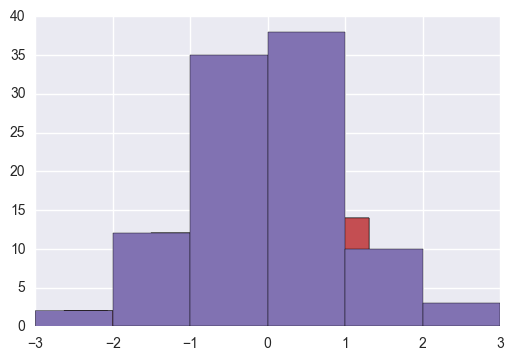

In [92]:
df = DataFrame(np.random.randn(200).reshape((100,2)),columns=['col1','col2'])
# ヒストグラムで適当な区間を見つける。
df["col1"].hist()
plt.hist(df["col1"], ec='black') # bins="auto", ec:edgecolor
plt.hist(df["col1"], bins=10)
plt.hist(df["col1"], bins=[-3, -2, -1, 0, 1, 2, 3]) # 最後はリストで。最左と最右がすべての値を含むように。
# リストの要素は、左が開区間。右が閉区間。
# 戻り値はタプル。(頻度, bins, コメント)

# 最適な区間が見つかれば、binningする。
# pd.cut(df["col1"],bins=[-3, -2, -1, 0, 1, 2, 3])はカテゴリ型
cate = pd.cut(df["col1"],bins=[-3, -2, -1, 0, 1, 2, 3]).cat.categories.tolist()

# カテゴリ化
df["col1cate"] = pd.cut(df["col1"],bins=[-3, -2, -1, 0, 1, 2, 3]).map(lambda x: cate.index(x))